In [1]:

from IPython.display import HTML

HTML('<h1 style="text-align: center; background-color:lightblue; color: blue; padding: 20px;">STELLAR OBJECT CLASSIFICATION</h1>')

In [2]:
from IPython.display import Image

# Display the GIF using the Image function
Image(url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQhF0wcnjc2DeqbRrdqvfUUjyxKWY2uO0kBkg&s', width=1200)

# Stellar Object Classification

This project applies machine learning techniques to classify celestial objects into stars, galaxies, and quasars, enabling efficient data processing for large-scale astronomical surveys.


# Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading Dataset

In [4]:
data = pd.read_csv(r"star_classification.csv")

###Introduction

Astronomical datasets contain vast amounts of information on celestial objects. This project aims to develop machine learning models to classify these objects, facilitating insights into their characteristics and improving data analysis pipelines for research.

### Objectives:
- Classify objects into stars, galaxies, and quasars using machine learning.
- Identify the most influential features for classification.
- Provide data-driven insights for astronomical studies.


In [5]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


### Dataset Description

The dataset contains detailed information about celestial objects, collected from astronomical surveys.

### Key Features:
- `obj_ID`: Unique identifier for each celestial object.
- `alpha`: Right Ascension angle (at J2000 epoch).
- `delta`: Declination angle (at J2000 epoch).
- `u, g, r, i, z`: Photometric measurements in different filters.
- `class`: Target variable indicating the type of celestial object (star, galaxy, or quasar).
- `redshift`: Measures the increase in wavelength due to the expansion of the universe.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

# Describe for understanding data ratio Mean, Std,Count

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


Checking null Values

In [8]:
data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

 Value count of Cam COl

In [9]:
data.cam_col.value_counts()

cam_col
4    19573
3    18851
5    18537
2    17117
1    13227
6    12695
Name: count, dtype: int64

 Value count of Class

In [10]:
data["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

### Key Insights:
1. **Balanced Class Distribution**:
   - All classes (stars, galaxies, quasars) have relatively equal representation.
   
2. **Feature Correlations**:
   - Photometric filters (`g, r, z`) show strong correlations with object classification.
   
3. **Redshift Patterns**:
   - Higher redshift values are associated with galaxies and quasars.

### Visualizations:
- Distribution of object classes.
- Scatter plots of photometric measurements vs. redshift.
- Heatmap of feature correlations.


In [11]:
import seaborn as sns

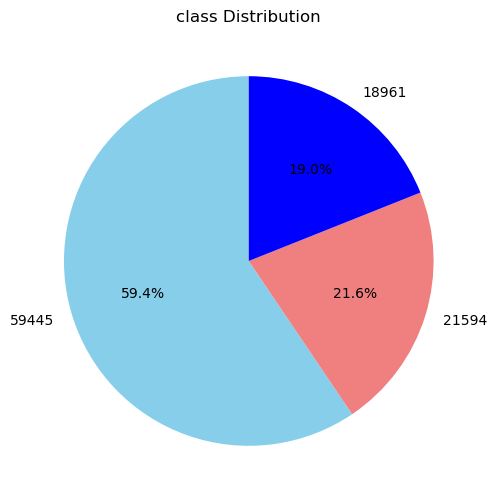

In [12]:
class_counts =data['class'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts, autopct='%1.1f%%', colors=['skyblue', 'lightcoral','blue'], startangle=90)
plt.title('class Distribution')
plt.show()

## Class Distribution

The pie chart above represents the distribution of celestial object classes in the dataset:

- **Blue (19.0%)**: Represents stars with a total count of **18,961** observations.
- **Red (21.6%)**: Represents quasars with **21,594** observations.
- **Light Blue (59.4%)**: Represents galaxies, the majority class, with **59,445** observations.

### Insights:
- The dataset is imbalanced, with galaxies constituting the largest proportion of objects.
- Stars and quasars form the minority classes, requiring techniques like **SMOTE** to address this imbalance during model training.
- This distribution highlights the need for careful preprocessing to ensure fair representation of all classes in the machine learning model.


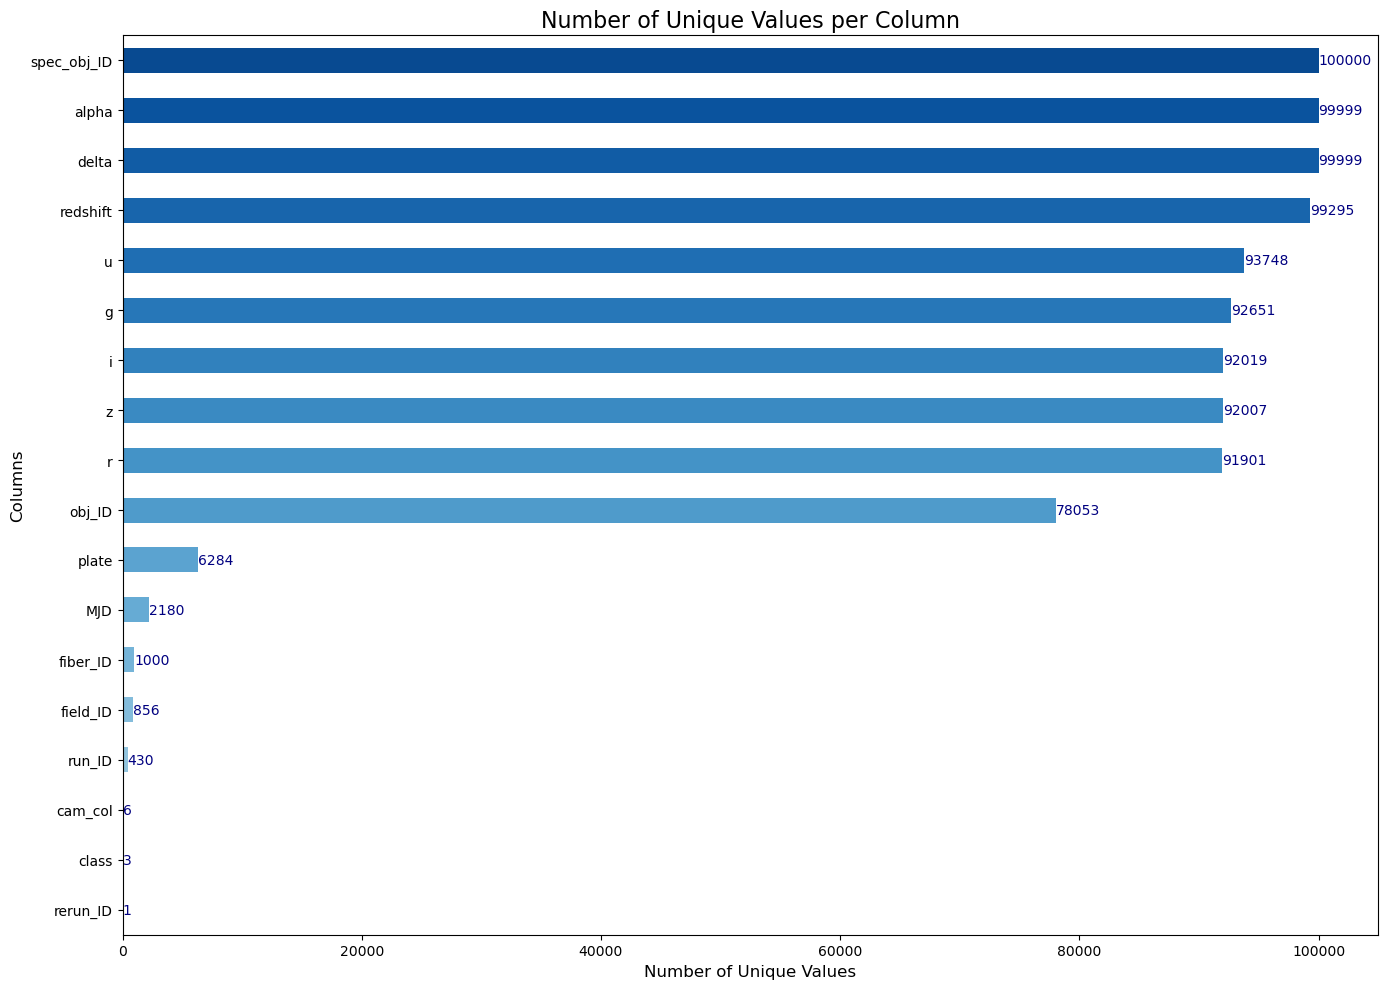

In [13]:
from matplotlib import cm

# Assuming 'data' is a DataFrame
unique_values = data.nunique().sort_values()  # Calculate unique values for each column
unique_values = pd.DataFrame(unique_values, columns=['Unique Values'])  # Convert to DataFrame
rows = len(unique_values)  # Get the number of rows (columns in original data)
unique_values["Total Rows"] = rows  # Add 'Total Rows' column

# Plot using matplotlib
num_bars = len(unique_values)
colors = cm.Blues(np.linspace(0.3, 0.9, num_bars))  # Create color gradient
plt.figure(figsize=(14, 10))

# Generate horizontal bar plot
ax = unique_values['Unique Values'].plot(kind="barh", color=colors)
plt.title("Number of Unique Values per Column", fontsize=16)
plt.ylabel("Columns", fontsize=12)
plt.xlabel("Number of Unique Values", fontsize=12)

# Annotate the bars with the values
for p in ax.patches:
    ax.annotate(
        str(int(p.get_width())),  # Convert to integer for cleaner display
        (p.get_width() + 0.5, p.get_y() + p.get_height() / 2.),  # Position of annotation
        va='center',
        ha='left',
        fontsize=10,
        color='navy'
    )

plt.tight_layout()  # Adjust layout for better fit
plt.show()


## Unique Values per Column

The bar chart illustrates the number of unique values for each column in the dataset.

### Observations:
- **spec_obj_ID** has the highest number of unique values (100,000), indicating it uniquely identifies objects in the dataset.
- Columns such as **alpha**, **delta**, and **obj_ID** also contain a large number of unique values, reflecting specific spatial or observational data for celestial objects.
- **class** has only 3 unique values (Galaxy, Star, Quasar), consistent with the target labels for classification.
- **rerun_ID** has a single unique value, likely serving as a constant identifier for the dataset's processing version.
- Features such as **fiber_ID**, **plate**, and **MJD** have relatively fewer unique values, potentially reflecting grouped observational data.

### Insights:
- Columns with a high number of unique values, such as **spec_obj_ID**, are identifiers and may not contribute directly to predictive modeling.
- Low-variance features like **rerun_ID** can be excluded during preprocessing.
- The diverse range of unique values across columns highlights the richness of the dataset and the importance of preprocessing to ensure meaningful feature contributions.


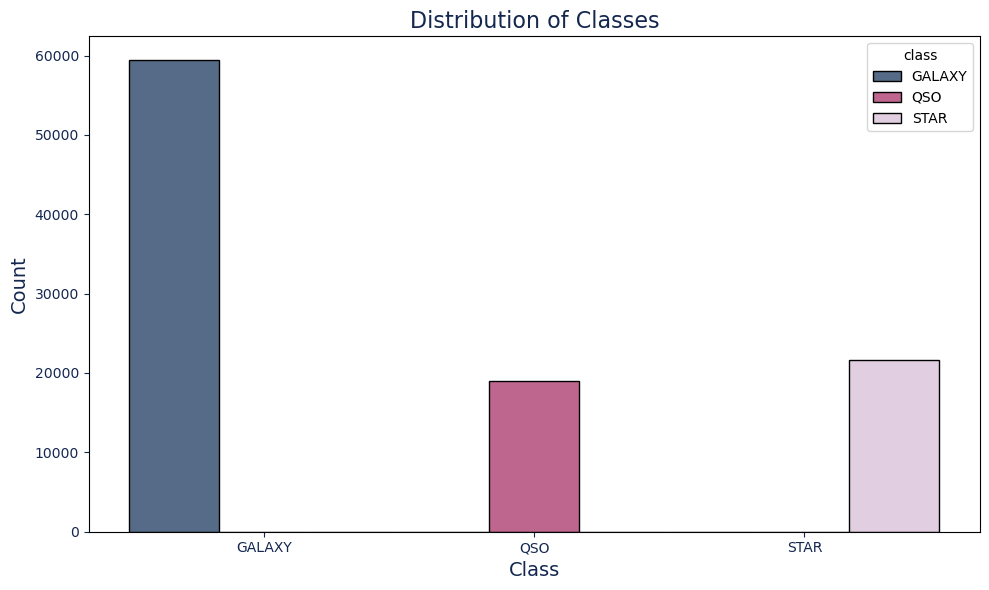

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is a pandas DataFrame
# Define a custom dark color palette
dark_palette = ['#1e3a5f', '#AA336A', '#D8BFD8']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the histogram using seaborn to simplify color handling
sns.histplot(
    data=data,
    x='class',
    hue='class',
    palette=dark_palette,
    multiple='dodge',  # Ensure bars for each class are separated
    ax=ax
)

# Customize the plot
ax.set_title('Distribution of Classes', fontsize=16, color='#13274F')
ax.set_xlabel('Class', fontsize=14, color='#13274F')
ax.set_ylabel('Count', fontsize=14, color='#13274F')

# Customize tick labels' colors
ax.tick_params(axis='x', colors='#13274F')
ax.tick_params(axis='y', colors='#13274F')

# Adjust layout for margins
plt.tight_layout()

# Show the plot
plt.show()



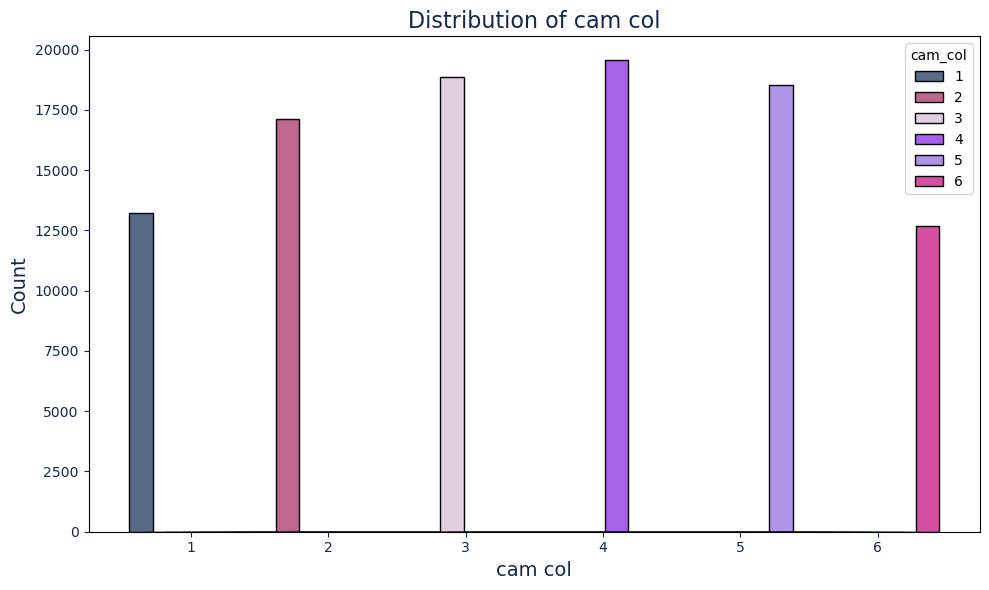

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is a pandas DataFrame
# Define a custom dark color palette
dark_palette = ['#1e3a5f', '#AA336A', '#D8BFD8', '#8A2BE2', '#9370DB', '#C71585']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the histogram using seaborn with wider bars
sns.histplot(
    data=data,
    x='cam_col',
    hue='cam_col',
    palette=dark_palette,
    multiple='dodge',  # Ensure bars for each group are separated
    shrink=8,  # Adjust bar width (closer to 1.0 makes bars wider)
    ax=ax
)

# Customize the plot
ax.set_title('Distribution of cam col', fontsize=16, color='#13274F')
ax.set_xlabel('cam col', fontsize=14, color='#13274F')
ax.set_ylabel('Count', fontsize=14, color='#13274F')

# Customize tick labels' colors
ax.tick_params(axis='x', colors='#13274F')
ax.tick_params(axis='y', colors='#13274F')

# Adjust layout for margins
plt.tight_layout()

# Show the plot
plt.show()


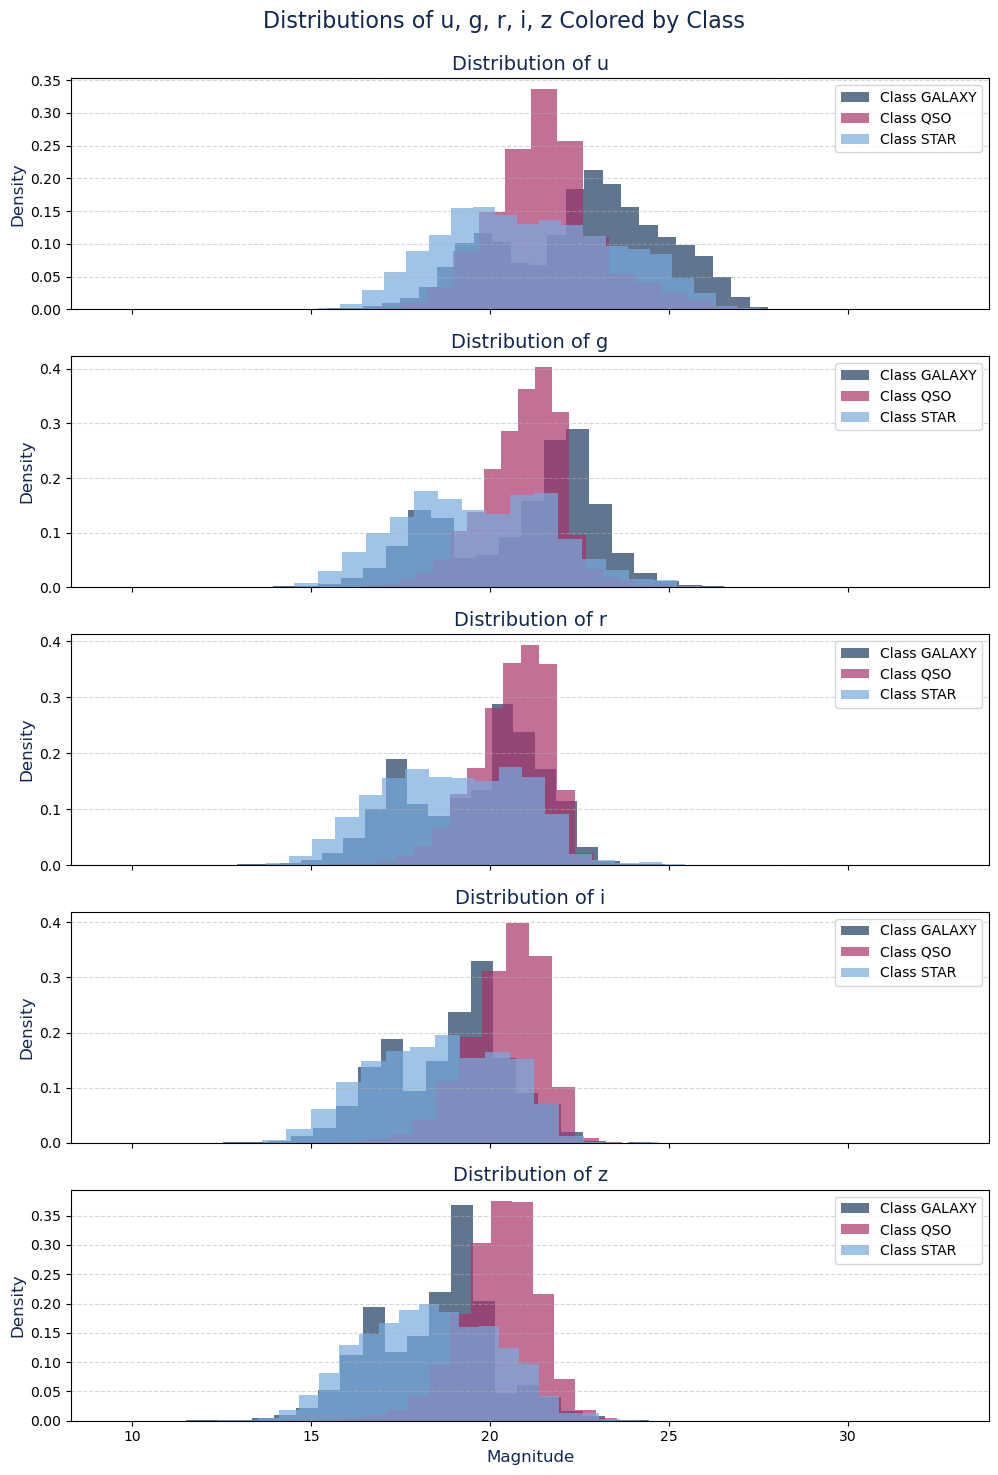

In [20]:


# Filter the DataFrame to remove rows where 'z' is negative
data = data[data['z'] >= 0]

# Define features and colors
features = ['u', 'g', 'r', 'i', 'z']
n_features = len(features)
palette = ['#1e3a5f', '#AA336A', '#76ABDF']  # Custom color palette for classes

# Create subplots
fig, axes = plt.subplots(n_features, 1, figsize=(10, 15), sharex=True)

# Iterate through features and plot histograms for each
for i, feature in enumerate(features):
    ax = axes[i]
    for j, class_name in enumerate(data['class'].unique()):
        class_data = data[data['class'] == class_name][feature]
        ax.hist(
            class_data,
            bins=30,
            density=True,  # Probability density normalization
            alpha=0.7,
            color=palette[j % len(palette)],
            label=f'Class {class_name}'
        )
    # Title and labels
    ax.set_title(f'Distribution of {feature}', fontsize=14, color='#13274F')
    ax.set_ylabel('Density', fontsize=12, color='#13274F')
    if i == n_features - 1:  # Add x-label only to the bottom subplot
        ax.set_xlabel('Magnitude', fontsize=12, color='#13274F')
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the overall title
fig.suptitle('Distributions of u, g, r, i, z Colored by Class', fontsize=16, color='#13274F')

# Show the plot
plt.show()




**Histograms of u, g, r, i, z Colored by Class**

This image displays a series of histograms visualizing the distribution of five different spectral bands (u, g, r, i, z) across three classes of astronomical objects: GALAXY, QSO, and STAR. Each histogram provides insights into the density of objects within a specific magnitude range for each class and band.

**Key Observations:**

* **GALAXIES:** Galaxies tend to have a higher density in the redder bands (r, i, z), indicating a redder overall color. This is likely due to the presence of older, redder stars within galaxies.
* **QSOs:** Quasars (QSOs) exhibit a broader distribution across all bands, with peaks in the bluer bands (u, g), suggesting a bluer overall color. This is consistent with their active galactic nuclei, which emit strongly across a wide range of wavelengths.
* **STARS:** Stars generally show a distribution concentrated in the bluer bands (u, g), indicating a bluer overall color. This is due to the presence of younger, hotter stars, which emit more strongly in the blue part of the spectrum.

**Overall, the histograms provide a clear visual representation of the spectral differences between galaxies, quasars, and stars, highlighting the distinct characteristics of each class.**

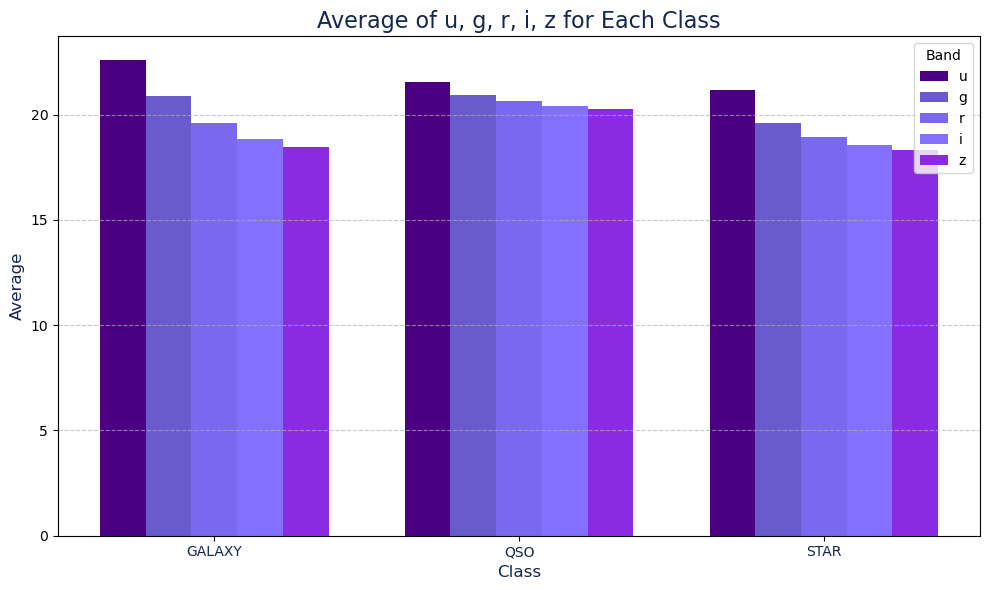

In [21]:

# Calculate the average values for each class
average_values = data.groupby('class')[['u', 'g', 'r', 'i', 'z']].mean()

# Transpose the DataFrame to make it easier for grouped plotting
average_values_transposed = average_values.T

# Define class labels and feature bands
classes = average_values.index
bands = average_values.columns

# Define color palette
colors = ['#4B0082', '#6A5ACD', '#7B68EE', '#8470FF', '#8A2BE2']  # Custom purple and blue tones

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate bar positions
x = np.arange(len(classes))  # The x locations for the groups
width = 0.15  # The width of the bars
n_bands = len(bands)

# Plot each band
for i, band in enumerate(bands):
    ax.bar(
        x + i * width,
        average_values[band],
        width,
        label=band,
        color=colors[i % len(colors)]
    )

# Add labels, title, and legend
ax.set_title('Average of u, g, r, i, z for Each Class', fontsize=16, color='#13274F')
ax.set_xlabel('Class', fontsize=12, color='#13274F')
ax.set_ylabel('Average', fontsize=12, color='#13274F')
ax.set_xticks(x + (n_bands - 1) * width / 2)
ax.set_xticklabels(classes, fontsize=10, color='#13274F')
ax.legend(title="Band", fontsize=10)

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




**Average of u, g, r, i, z for Each Class**

This image presents a bar chart comparing the average values of five spectral bands (u, g, r, i, z) across three classes of astronomical objects: GALAXY, QSO, and STAR. Each bar represents the average magnitude in a particular band for a specific class.

**Key Observations:**

* **GALAXY:** Galaxies generally show lower average magnitudes in the bluer bands (u, g) and higher average magnitudes in the redder bands (r, i, z). This suggests that galaxies tend to be redder overall, which is consistent with the presence of older, redder stars within them.
* **QSO:** Quasars (QSOs) exhibit a relatively flat distribution across the bands, with slightly higher average magnitudes in the bluer bands (u, g). This indicates that QSOs have a bluer overall color, which is characteristic of their active galactic nuclei.
* **STAR:** Stars show a clear trend of decreasing average magnitude from the bluer bands (u, g) to the redder bands (r, i, z). This suggests that stars are generally bluer, which is consistent with the presence of younger, hotter stars.

**Overall, the bar chart provides a visual comparison of the average spectral properties of galaxies, quasars, and stars, highlighting the distinct characteristics of each class.**

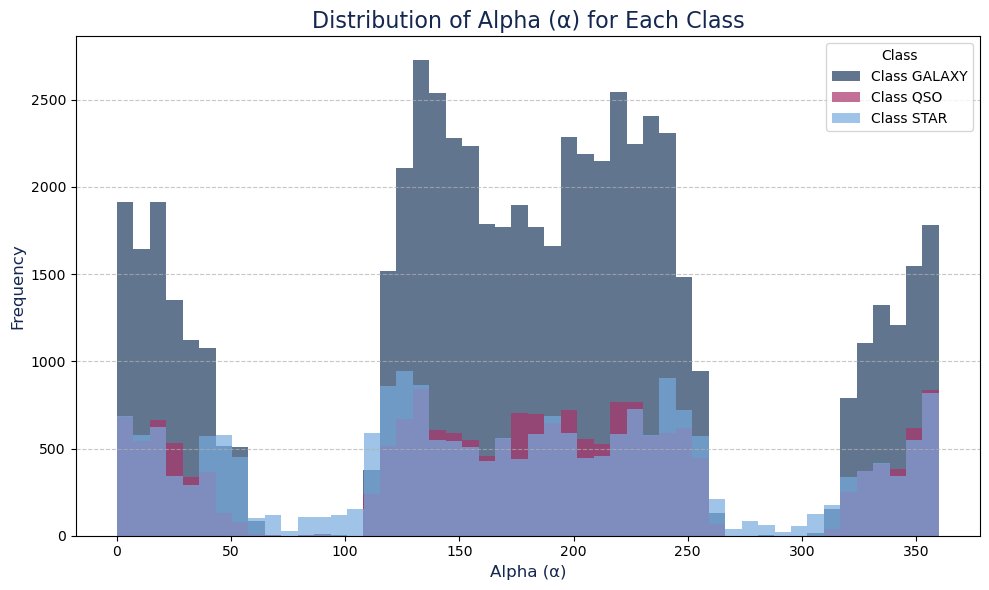

In [22]:
# Define a dark color palette
dark_palette = ['#1e3a5f', '#AA336A', '#76ABDF']  # Custom colors for each class

# Create the figure
plt.figure(figsize=(10, 6))

# Plot histograms for each class
for i, class_name in enumerate(data['class'].unique()):
    class_data = data[data['class'] == class_name]['alpha']
    plt.hist(
        class_data,
        bins=50,
        alpha=0.7,  # Set transparency for overlay
        label=f'Class {class_name}',
        color=dark_palette[i % len(dark_palette)],  # Cycle through colors
        density=False  # Frequency (default behavior)
    )

# Add title, labels, and legend
plt.title('Distribution of Alpha (α) for Each Class', fontsize=16, color='#13274F')
plt.xlabel('Alpha (α)', fontsize=12, color='#13274F')
plt.ylabel('Frequency', fontsize=12, color='#13274F')
plt.legend(title='Class', fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()

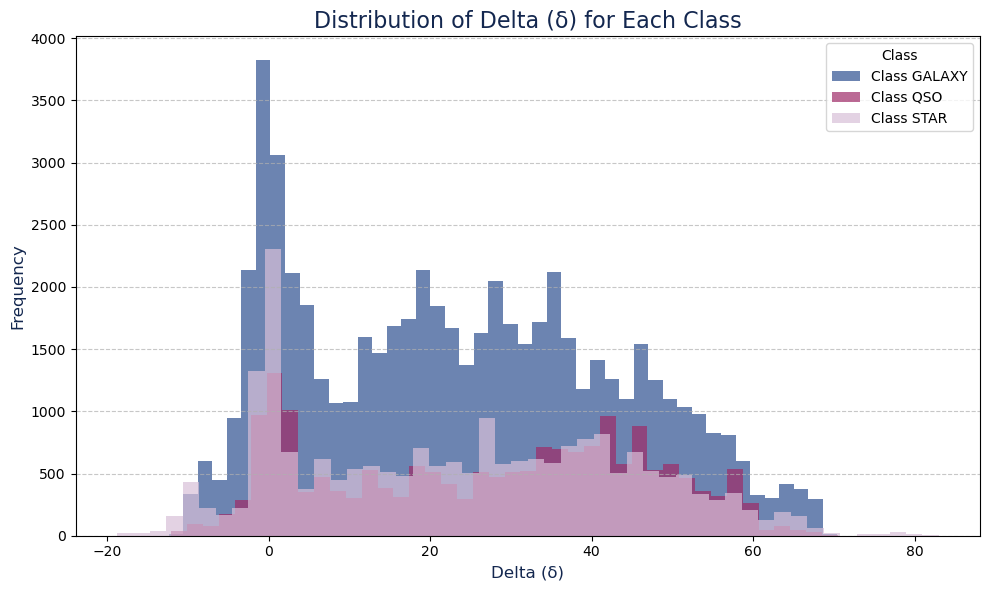

In [23]:
# Define the custom color palette
palette = ['#2E5090', '#9F2B68', '#D8BFD8']  # Custom colors for each class

# Create the figure
plt.figure(figsize=(10, 6))

# Plot histograms for each class
for i, class_name in enumerate(data['class'].unique()):
    class_data = data[data['class'] == class_name]['delta']
    plt.hist(
        class_data,
        bins=50,
        alpha=0.7,  # Set transparency for overlay
        label=f'Class {class_name}',
        color=palette[i % len(palette)],  # Cycle through the custom palette
        density=False  # Show frequency
    )

# Add title, labels, and legend
plt.title('Distribution of Delta (δ) for Each Class', fontsize=16, color='#13274F')
plt.xlabel('Delta (δ)', fontsize=12, color='#13274F')
plt.ylabel('Frequency', fontsize=12, color='#13274F')
plt.legend(title='Class', fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()

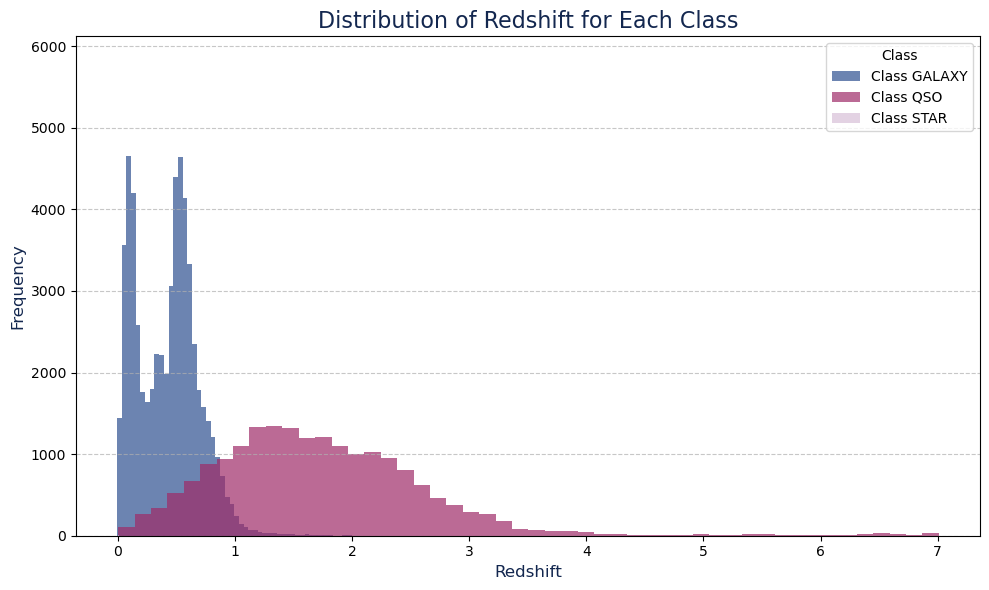

In [24]:
# Define the custom color palette
palette = ['#2E5090', '#9F2B68', '#D8BFD8']  # Custom colors for each class

# Create the figure
plt.figure(figsize=(10, 6))

# Plot histograms for each class
for i, class_name in enumerate(data['class'].unique()):
    class_data = data[data['class'] == class_name]['redshift']
    plt.hist(
        class_data,
        bins=50,
        alpha=0.7,  # Set transparency for overlay
        label=f'Class {class_name}',
        color=palette[i % len(palette)],  # Cycle through the custom palette
        density=False  # Show frequency
    )

# Add title, labels, and legend
plt.title('Distribution of Redshift for Each Class', fontsize=16, color='#13274F')
plt.xlabel('Redshift', fontsize=12, color='#13274F')
plt.ylabel('Frequency', fontsize=12, color='#13274F')
plt.legend(title='Class', fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()

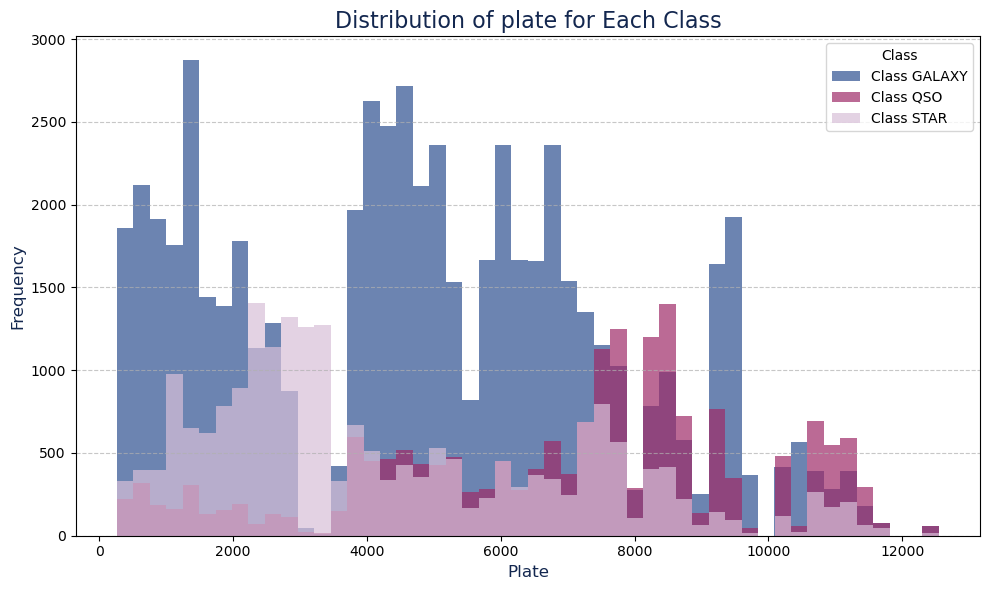

In [25]:
# Define the custom color palette
palette = ['#2E5090', '#9F2B68', '#D8BFD8']  # Custom colors for each class

# Create the figure
plt.figure(figsize=(10, 6))

# Plot histograms for each class
for i, class_name in enumerate(data['class'].unique()):
    class_data = data[data['class'] == class_name]['plate']
    plt.hist(
        class_data,
        bins=50,
        alpha=0.7,  # Set transparency for overlay
        label=f'Class {class_name}',
        color=palette[i % len(palette)],  # Cycle through the custom palette
        density=False  # Show frequency
    )

# Add title, labels, and legend
plt.title('Distribution of plate for Each Class', fontsize=16, color='#13274F')
plt.xlabel('Plate', fontsize=12, color='#13274F')
plt.ylabel('Frequency', fontsize=12, color='#13274F')
plt.legend(title='Class', fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()

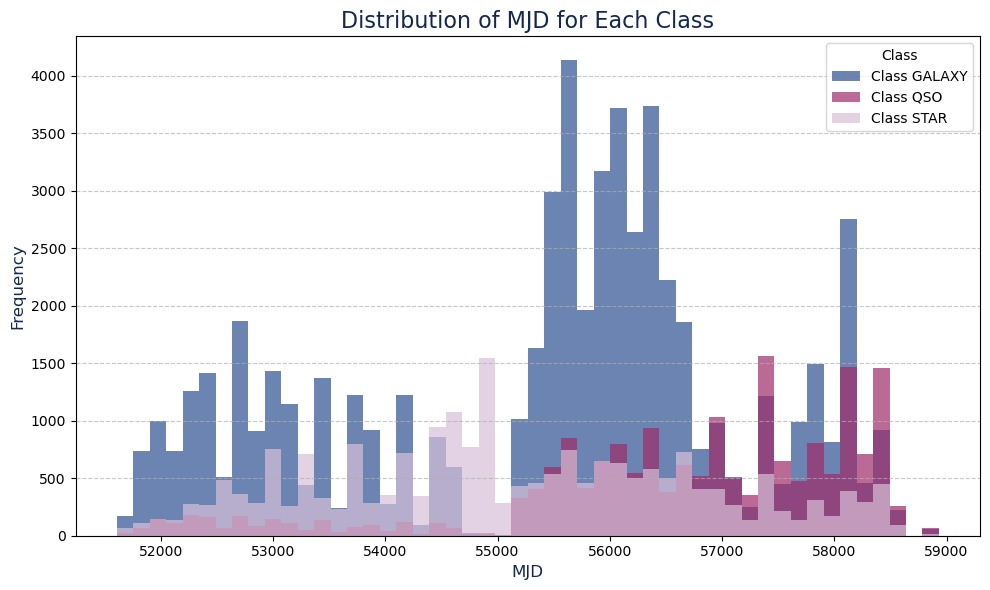

In [26]:
# Define the custom color palette
palette = ['#2E5090', '#9F2B68', '#D8BFD8']  # Custom colors for each class

# Create the figure
plt.figure(figsize=(10, 6))

# Plot histograms for each class
for i, class_name in enumerate(data['class'].unique()):
    class_data = data[data['class'] == class_name]['MJD']
    plt.hist(
        class_data,
        bins=50,
        alpha=0.7,  # Set transparency for overlay
        label=f'Class {class_name}',
        color=palette[i % len(palette)],  # Cycle through the custom palette
        density=False  # Show frequency
    )

# Add title, labels, and legend
plt.title('Distribution of MJD for Each Class', fontsize=16, color='#13274F')
plt.xlabel('MJD', fontsize=12, color='#13274F')
plt.ylabel('Frequency', fontsize=12, color='#13274F')
plt.legend(title='Class', fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()

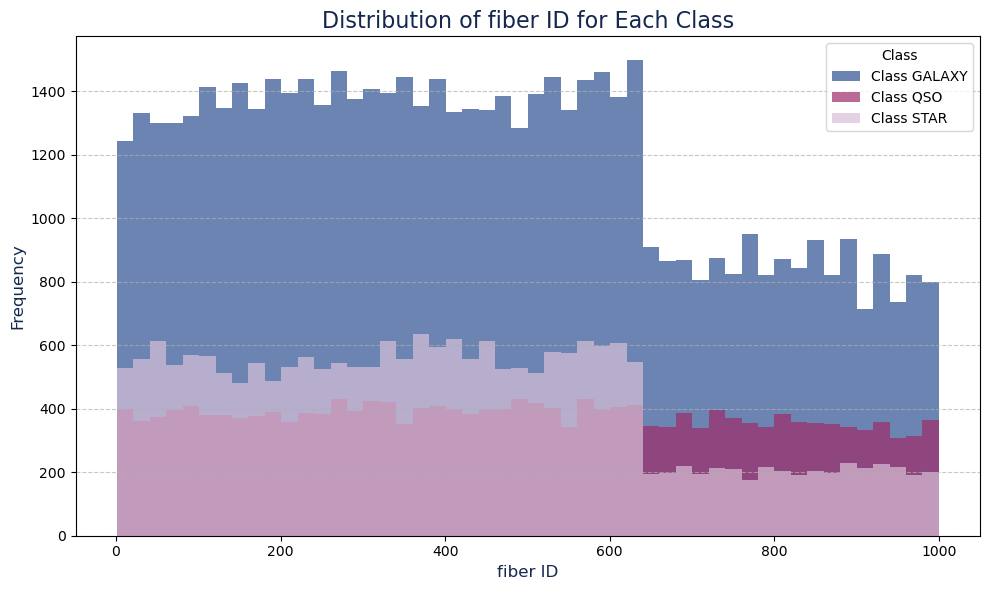

In [27]:
 # Define the custom color palette
palette = ['#2E5090', '#9F2B68', '#D8BFD8']  # Custom colors for each class

# Create the figure
plt.figure(figsize=(10, 6))

# Plot histograms for each class
for i, class_name in enumerate(data['class'].unique()):
    class_data = data[data['class'] == class_name]['fiber_ID']
    plt.hist(
        class_data,
        bins=50,
        alpha=0.7,  # Set transparency for overlay
        label=f'Class {class_name}',
        color=palette[i % len(palette)],  # Cycle through the custom palette
        density=False  # Show frequency
    )

# Add title, labels, and legend
plt.title('Distribution of fiber ID for Each Class', fontsize=16, color='#13274F')
plt.xlabel('fiber ID', fontsize=12, color='#13274F')
plt.ylabel('Frequency', fontsize=12, color='#13274F')
plt.legend(title='Class', fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()

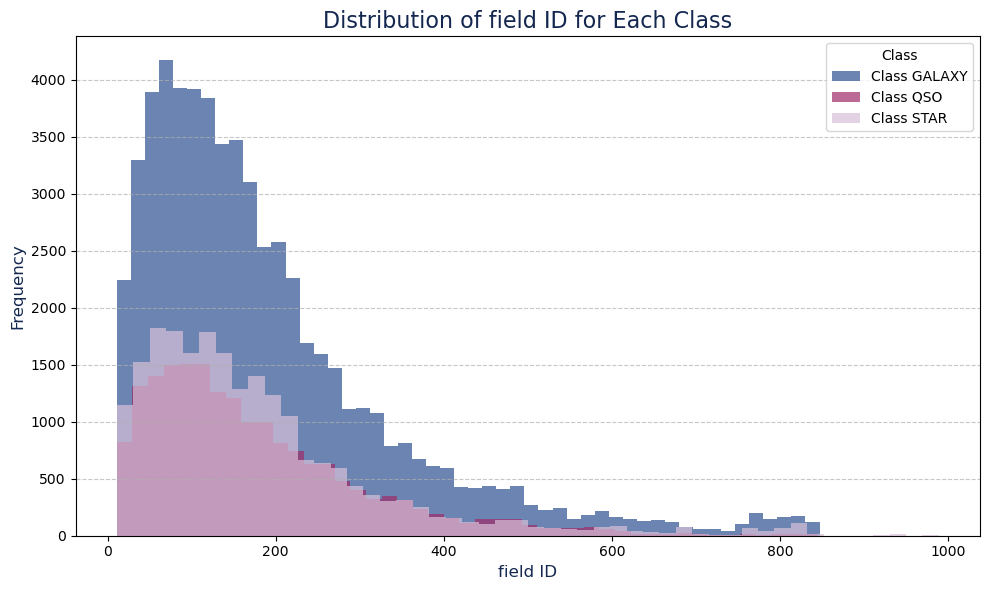

In [28]:
 # Define the custom color palette
palette = ['#2E5090', '#9F2B68', '#D8BFD8']  # Custom colors for each class

# Create the figure
plt.figure(figsize=(10, 6))

# Plot histograms for each class
for i, class_name in enumerate(data['class'].unique()):
    class_data = data[data['class'] == class_name]['field_ID']
    plt.hist(
        class_data,
        bins=50,
        alpha=0.7,  # Set transparency for overlay
        label=f'Class {class_name}',
        color=palette[i % len(palette)],  # Cycle through the custom palette
        density=False  # Show frequency
    )

# Add title, labels, and legend
plt.title('Distribution of field ID for Each Class', fontsize=16, color='#13274F')
plt.xlabel('field ID', fontsize=12, color='#13274F')
plt.ylabel('Frequency', fontsize=12, color='#13274F')
plt.legend(title='Class', fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()



**Distribution of field ID for Each Class**

This image presents a histogram visualizing the distribution of "field ID" across three classes of astronomical objects: GALAXY, QSO, and STAR. Each histogram bar represents the frequency of objects within a specific field ID range for each class.

**Key Observations:**

* **GALAXY:** Galaxies exhibit a higher frequency across a wider range of field IDs, indicating that they are distributed more evenly across different fields.
* **QSO:** Quasars (QSOs) show a more concentrated distribution, with a peak around lower field IDs. This suggests that QSOs are more likely to be found in certain specific fields.
* **STAR:** Stars show a similar distribution to QSOs, with a concentrated peak around lower field IDs. This indicates that stars are also more likely to be found in specific fields, possibly due to observational biases or selection criteria.

**Overall, the histogram provides insights into the spatial distribution of galaxies, quasars, and stars within the dataset. It reveals that galaxies are more evenly distributed across different fields, while QSOs and stars are more concentrated in specific regions.**

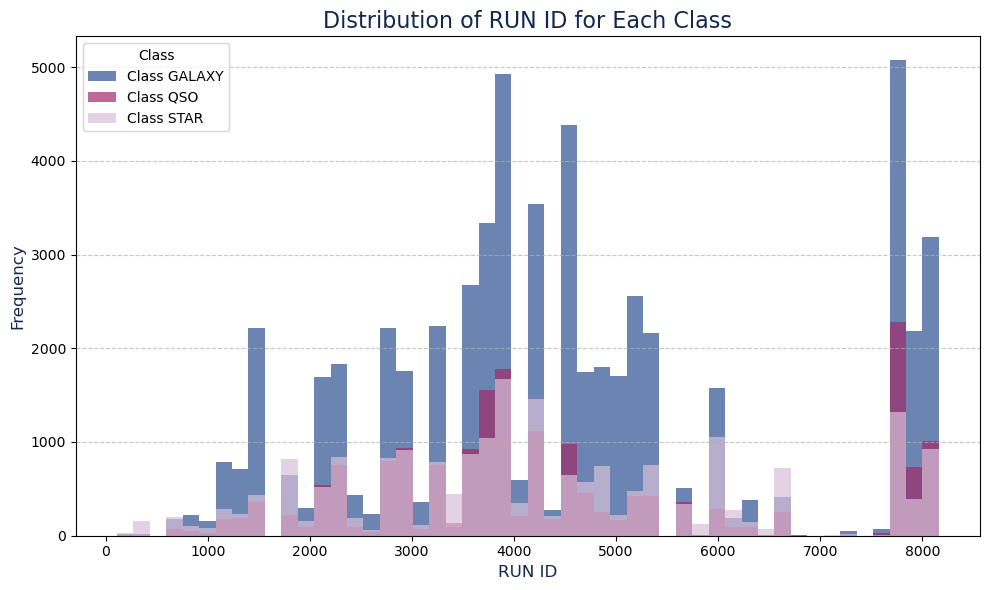

In [29]:
 # Define the custom color palette
palette = ['#2E5090', '#9F2B68', '#D8BFD8']  # Custom colors for each class

# Create the figure
plt.figure(figsize=(10, 6))

# Plot histograms for each class
for i, class_name in enumerate(data['class'].unique()):
    class_data = data[data['class'] == class_name]['run_ID']
    plt.hist(
        class_data,
        bins=50,
        alpha=0.7,  # Set transparency for overlay
        label=f'Class {class_name}',
        color=palette[i % len(palette)],  # Cycle through the custom palette
        density=False  # Show frequency
    )

# Add title, labels, and legend
plt.title('Distribution of RUN ID for Each Class', fontsize=16, color='#13274F')
plt.xlabel('RUN ID', fontsize=12, color='#13274F')
plt.ylabel('Frequency', fontsize=12, color='#13274F')
plt.legend(title='Class', fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()

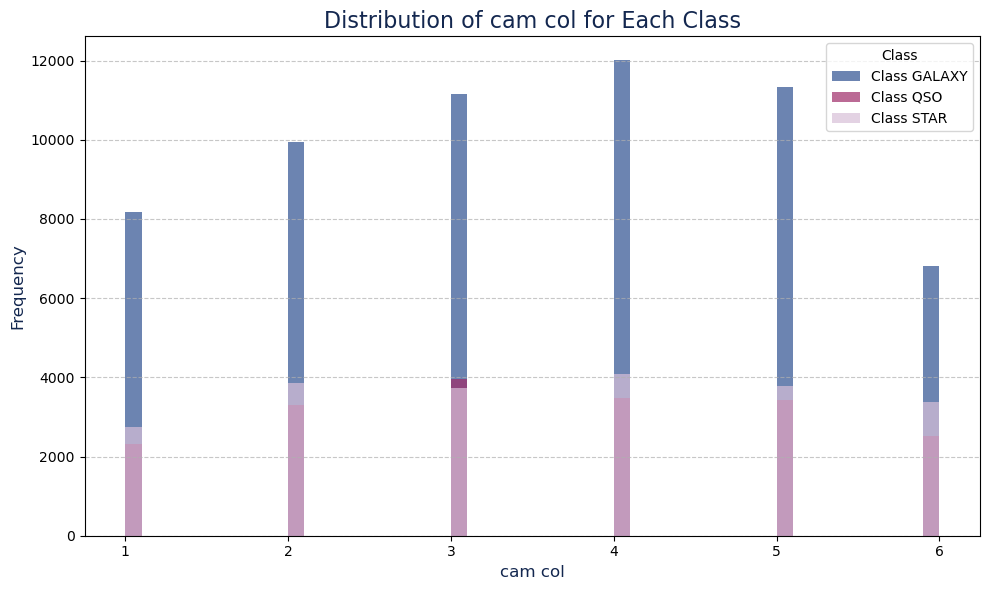

In [30]:
 # Define the custom color palette
palette = ['#2E5090', '#9F2B68', '#D8BFD8']  # Custom colors for each class

# Create the figure
plt.figure(figsize=(10, 6))

# Plot histograms for each class
for i, class_name in enumerate(data['class'].unique()):
    class_data = data[data['class'] == class_name]['cam_col']
    plt.hist(
        class_data,
        bins=50,
        alpha=0.7,  # Set transparency for overlay
        label=f'Class {class_name}',
        color=palette[i % len(palette)],  # Cycle through the custom palette
        density=False  # Show frequency
    )

# Add title, labels, and legend
plt.title('Distribution of cam col for Each Class', fontsize=16, color='#13274F')
plt.xlabel('cam col', fontsize=12, color='#13274F')
plt.ylabel('Frequency', fontsize=12, color='#13274F')
plt.legend(title='Class', fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()

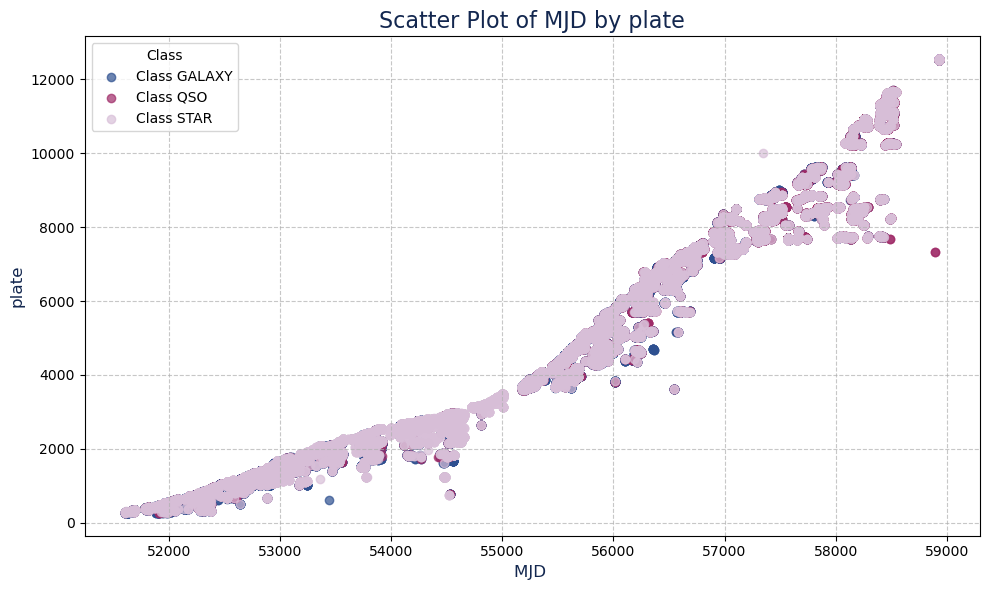

In [31]:
import matplotlib.pyplot as plt

# Define the custom color palette
palette = ['#2E5090', '#9F2B68', '#D8BFD8']  # Custom colors for each class

# Create the figure
plt.figure(figsize=(10, 6))

# Plot scatter points for each class
for i, class_name in enumerate(data['class'].unique()):
    class_data = data[data['class'] == class_name]
    plt.scatter(
        class_data['MJD'],
        class_data['plate'],
        label=f'Class {class_name}',
        color=palette[i % len(palette)],  # Cycle through the custom palette
        alpha=0.7  # Set transparency
    )

# Add title and labels
plt.title('Scatter Plot of MJD by plate', fontsize=16, color='#13274F')
plt.xlabel('MJD ', fontsize=12, color='#13274F')
plt.ylabel('plate', fontsize=12, color='#13274F')

# Add legend
plt.legend(title='Class', fontsize=10)

# Add grid for better readability
plt.grid(linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
data_copy=data.copy()

In [33]:
data.drop(columns=["rerun_ID"],axis=1,inplace=True)

# Correlation Matrix

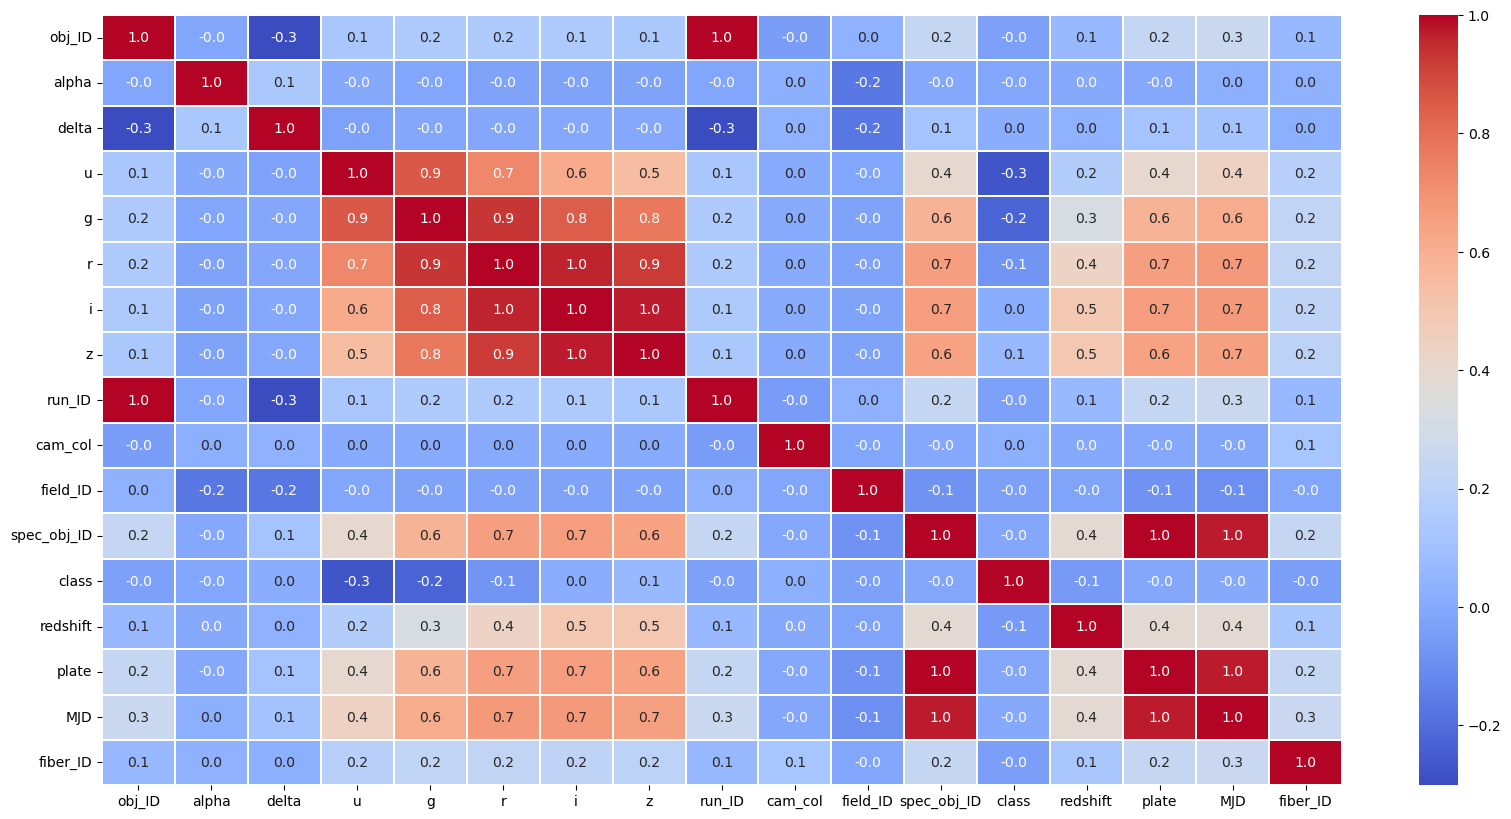

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['class'] = encoder.fit_transform(data['class'])
data = pd.get_dummies(data, drop_first=True)
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.1)
plt.show()



**Correlation Matrix**

This image displays a correlation matrix, which is a visual representation of the correlation between different variables in a dataset. Each cell in the matrix represents the correlation coefficient between two variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation).

**Key Observations:**

* **Diagonal:** The diagonal elements of the matrix are 1, indicating perfect correlation with itself.
* **Color Coding:** The color scheme used in the matrix indicates the strength and direction of the correlation. Red shades represent positive correlations, blue shades represent negative correlations, and white indicates no correlation.
* **Clustering:** The matrix appears to have some clustering patterns, suggesting groups of variables that are more strongly correlated with each other than with variables in other groups.

**Without more context about the specific data and variables involved, it's difficult to draw definitive conclusions about the relationships between the variables. However, some general observations can be made:**

* **Strong Correlations:** Some variables appear to have strong positive or negative correlations with each other. For example, there seems to be a strong positive correlation between `spec_obj_ID` and `plate`.
* **Weak Correlations:** Many variables appear to have weak or no correlation with each other. This is indicated by the light blue or white colors in the corresponding cells.

**To gain deeper insights, it would be helpful to know the nature of the variables and the specific context of the data.**

**If you have any further questions or would like a more detailed analysis, feel free to provide more information about the dataset and the specific relationships you're interested in.**

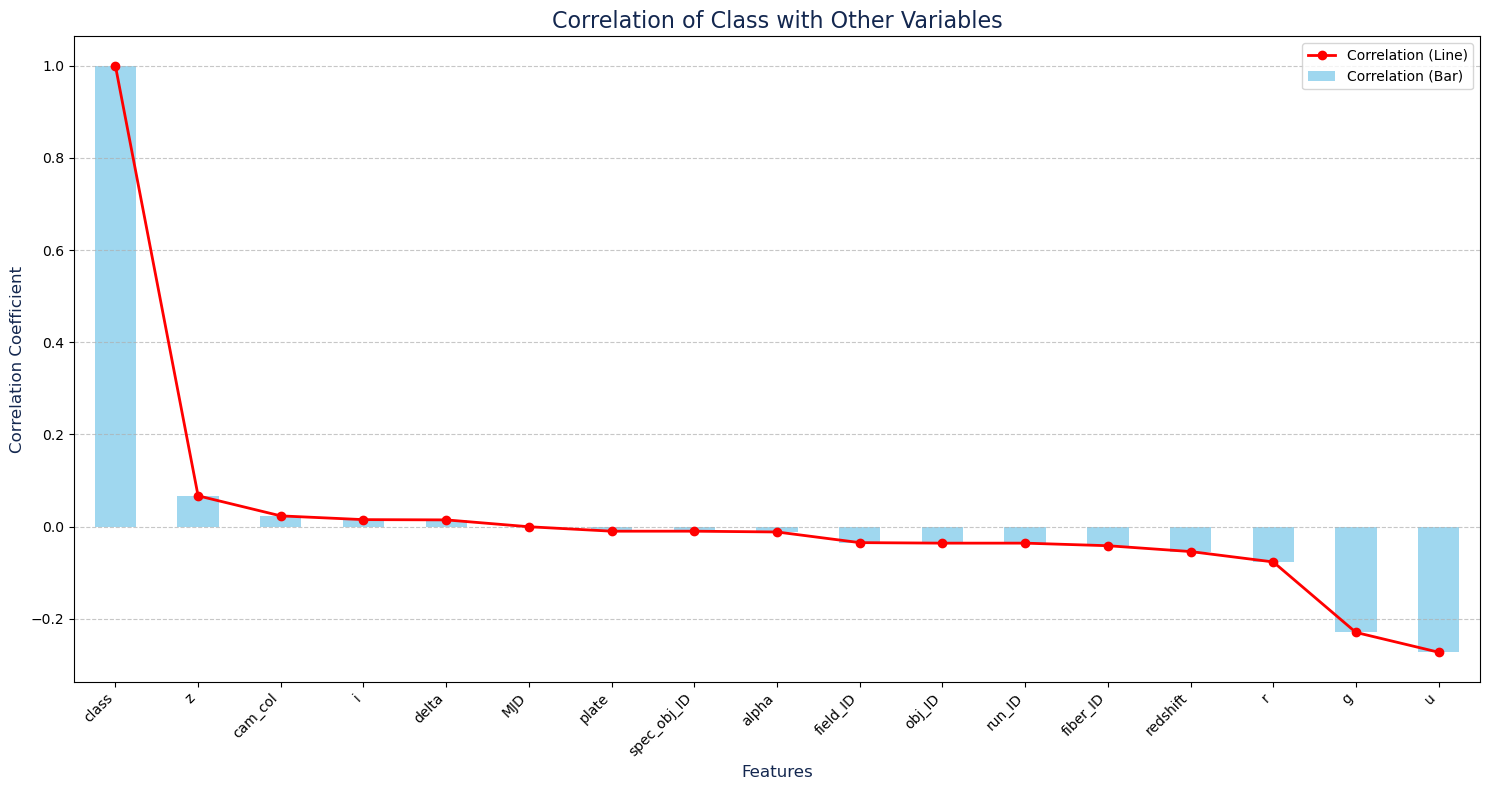

In [35]:


# Compute correlations
correlations = data.corr()['class'].sort_values(ascending=False)

# Create the figure
plt.figure(figsize=(15, 8))

# Plot the bar chart
correlations.plot(kind='bar', color='skyblue', alpha=0.8, label='Correlation (Bar)')

# Overlay a line plot
plt.plot(correlations.index, correlations.values, color='red', marker='o', linewidth=2, label='Correlation (Line)')

# Add title and labels
plt.title('Correlation of Class with Other Variables', fontsize=16, color='#13274F')
plt.xlabel('Features', fontsize=12, color='#13274F')
plt.ylabel('Correlation Coefficient', fontsize=12, color='#13274F')

# Add legend
plt.legend(fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




**Correlation of Class with Other Variables**

This image displays a correlation plot between the "class" variable and other variables in the dataset. It visualizes the correlation coefficients using both a line chart and a bar chart for better clarity.

**Key Observations:**

* **Correlation with Class:** The plot shows that the "class" variable has the strongest positive correlation with itself, as expected. This is represented by the value 1 on the y-axis.
* **Other Correlations:** The other variables exhibit varying degrees of correlation with the "class" variable. Some variables show positive correlations, while others show negative correlations.
* **Strength of Correlation:** The length of the bars and the position of the points on the line chart indicate the strength of the correlation. Longer bars and higher points represent stronger correlations.

**Without more context about the specific data and variables involved, it's difficult to draw definitive conclusions about the relationships between the "class" variable and the other variables. However, some general observations can be made:**

* **Important Features:** Variables with higher correlation coefficients (both positive and negative) are likely to be more important features for predicting the "class" variable.
* **Feature Selection:** This plot can be used as a starting point for feature selection, as highly correlated variables may be redundant and can be removed to improve model performance.

**To gain deeper insights, it would be helpful to know the nature of the variables and the specific context of the data.**

**If you have any further questions or would like a more detailed analysis, feel free to provide more information about the dataset and the specific relationships you're interested in.**

## Data Preprocessing

### Steps Performed:
1. **Handling Missing Values**:
   - Checked and imputed missing data where applicable.
   
2. **Scaling Features**:
   - Applied Min-Max Scaling to normalize photometric measurements (`u, g, r, i, z`).
   
3. **Balancing Classes**:
   - Used **SMOTE** to address class imbalance by generating synthetic samples for minority classes.

4. **Train-Test Split**:
   - Split the dataset into 80% training and 20% testing sets.


In [36]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(data)

In [37]:

x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

# SMOTE

In [38]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [39]:
x = data.drop(['class'], axis = 1)
y = data.loc[:,'class'].values

In [40]:
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 59445, 2: 21593, 1: 18961})
Resampled dataset shape Counter({0: 59445, 1: 59445, 2: 59445})


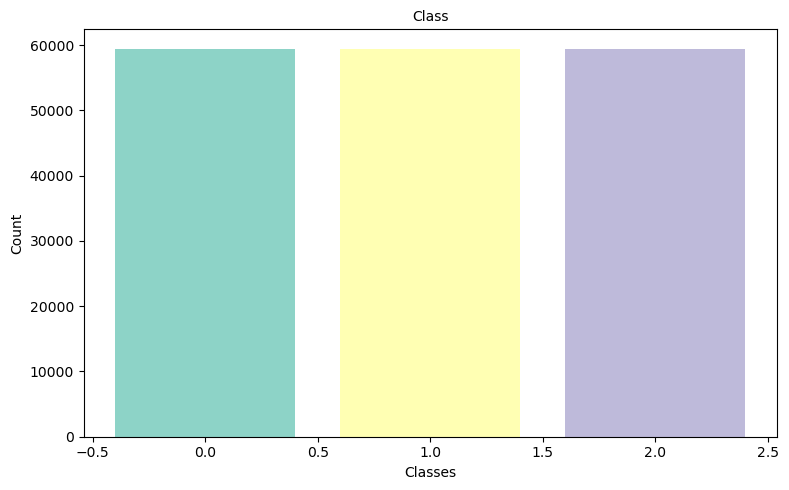

In [41]:


# Count the occurrences of each class
class_counts = Counter(y)

# Extract class names and counts
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Define a color palette
colors = plt.cm.Set3(range(len(classes)))  # Use the Set3 colormap

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(classes, counts, color=colors)

# Add title and labels
plt.title("Class", fontsize=10)
plt.xlabel("Classes", fontsize=10)
plt.ylabel("Count", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


# Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

 * Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
x_train.shape,x_test.shape

((142668, 16), (35667, 16))

In [45]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [46]:
from sklearn import metrics
prediction_test=model.predict(x_test)
print(metrics.accuracy_score(y_test,prediction_test))



0.9610844758460201


Axes(0.125,0.11;0.775x0.77)


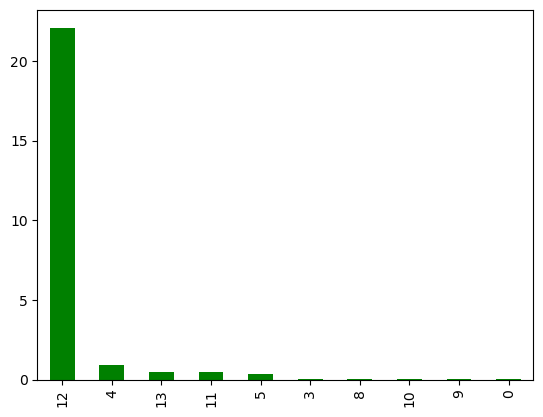

In [47]:
# Convert numpy array back to DataFrame with proper column names
x_df = pd.DataFrame(x)

# Generate weights
weights = pd.Series(model.coef_[0], index=x_df.columns)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar', color='green'))


Axes(0.125,0.11;0.775x0.77)


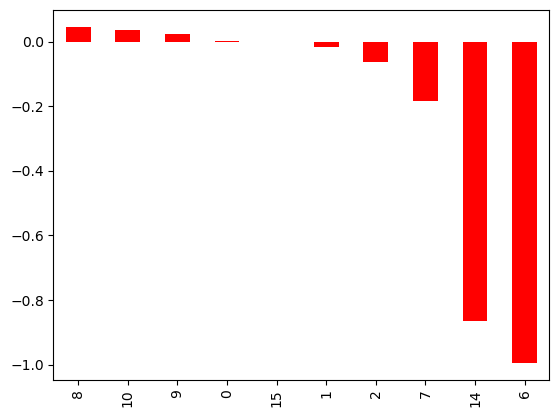

In [48]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar', color = 'red'))


 *  Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=50, max_leaf_nodes=30)
model_rf.fit(x_train, y_train)

# Make predictions

prediction_test = model_rf.predict(x_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.9715983962766703


<Axes: >

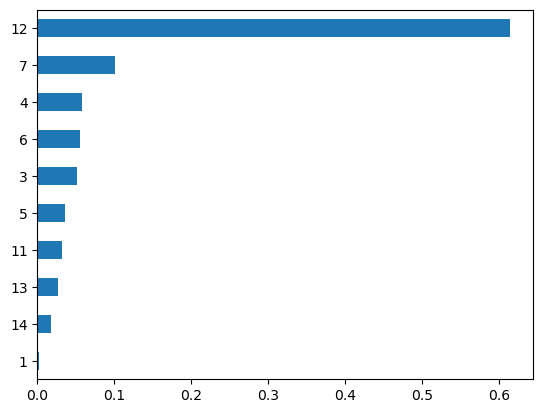

In [50]:
importances = model_rf.feature_importances_
weights = pd.Series(importances)
weights.sort_values()[-10:].plot(kind = 'barh')

# Model
- SVM

In [51]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear')
model.svm.fit(x_train,y_train)
preds = model.svm.predict(x_test)
metrics.accuracy_score(y_test, preds)

0.9657947121989514

In [52]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,preds))

[[11391   343   194]
 [  681 11180     2]
 [    0     0 11876]]


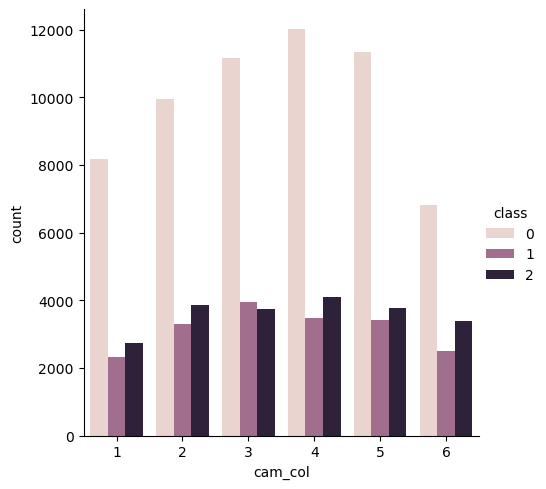

In [53]:
ax1 = sns.catplot(x="cam_col", kind="count", hue="class", data=data,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

* ADA Boost

In [54]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value)
# base_estimator = DecisionTreeClassifier (default value)
model.fit(x_train,y_train)
preds = model.predict(x_test)
metrics.accuracy_score(y_test, preds)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



0.6551434098746741

* XG Boost

In [55]:
#! pip install xgboost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
preds = model.predict(x_test)
metrics.accuracy_score(y_test, preds)

0.9832618386744049

In [ ]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,preds))

[[11683   208    37]
 [  335 11527     1]
 [   15     0 11861]]


In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11928
           1       0.98      0.97      0.98     11863
           2       1.00      1.00      1.00     11876

    accuracy                           0.98     35667
   macro avg       0.98      0.98      0.98     35667
weighted avg       0.98      0.98      0.98     35667



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define and train the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
xgb_clf.fit(x_train, y_train)

# Predict on the test set
predicted = xgb_clf.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, predicted)

print('Accuracy: %.3f' % accuracy)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[05:28:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Accuracy: 0.983


In [ ]:
classes = ['GALAXY','STAR','QSO']

* Confusion Matrix

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[05:29:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



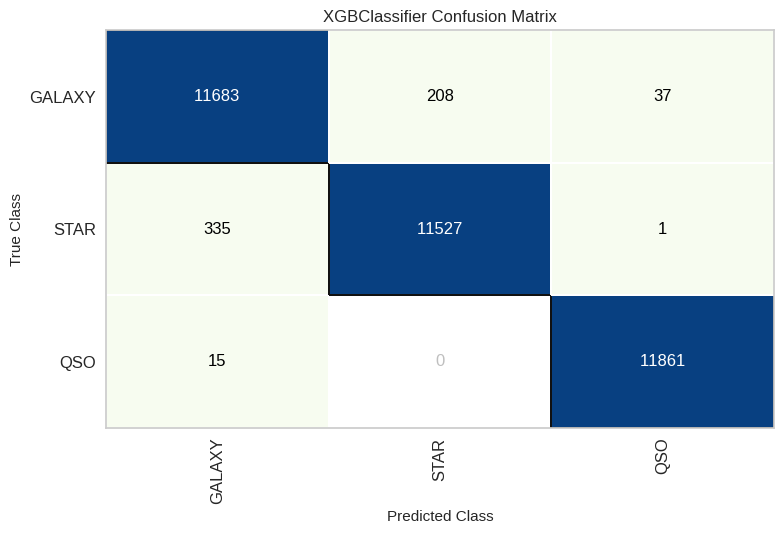

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
from xgboost import XGBClassifier

# Define and train the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
xgb_clf.fit(x_train, y_train)

# Create the confusion matrix visualizer
xgb_cm = ConfusionMatrix(xgb_clf, classes=classes, cmap='GnBu')

# Evaluate the model and display the confusion matrix
xgb_cm.score(x_test, y_test)
xgb_cm.show()

* ROC AUC CURVE

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[05:29:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




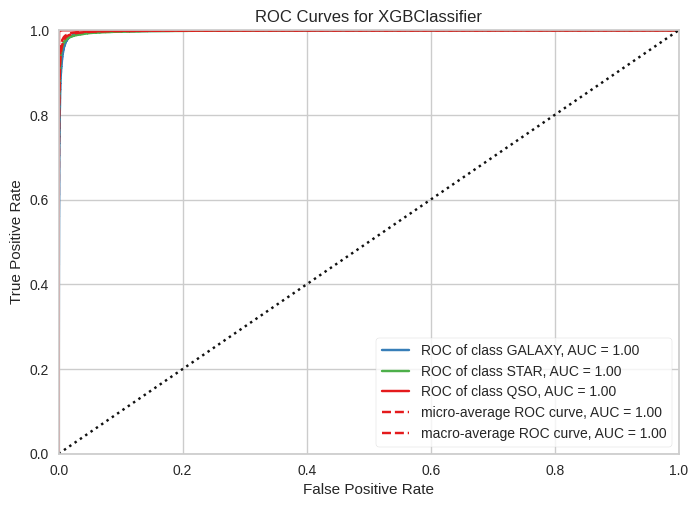

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
from xgboost import XGBClassifier
from yellowbrick.style import set_palette

# Define and train the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
xgb_clf.fit(x_train, y_train)

# Create the ROC AUC visualizer
visualizer = ROCAUC(xgb_clf, classes=classes)

# Set a bold color palette
set_palette('bold')

# Fit the visualizer
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer

# Score the model on the test data
visualizer.score(x_test, y_test)        # Evaluate the model on the test data

# Finalize and render the figure
visualizer.show()

### Class Prediction Error

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[05:29:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




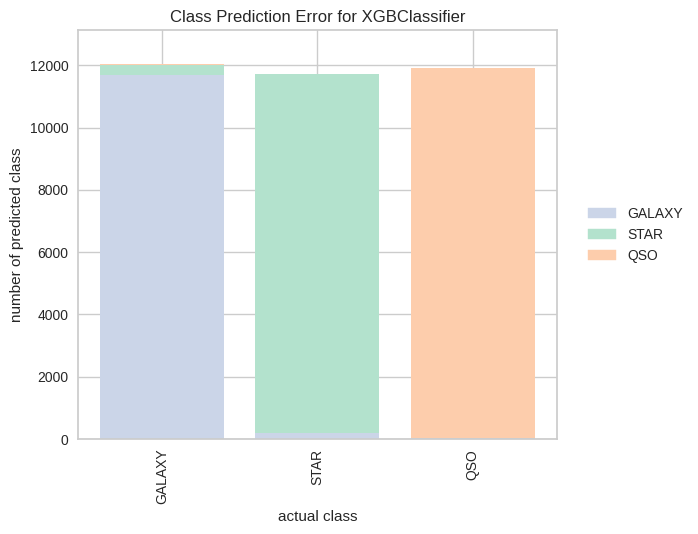

<Axes: title={'center': 'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
from yellowbrick.classifier import ClassPredictionError
from xgboost import XGBClassifier
from yellowbrick.style import set_palette

# Define and train the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
xgb_clf.fit(x_train, y_train)

# Create the Class Prediction Error visualizer
visualizer = ClassPredictionError(xgb_clf, classes=classes)

# Set a pastel color palette
set_palette('pastel')

# Fit the visualizer
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer

# Score the model on the test data
visualizer.score(x_test, y_test)        # Evaluate the model on the test data

# Draw the visualization
visualizer.show()


# RECOMMENDATIONS
 By applying machine learning techniques like XGBoost to classify celestial objects, the project provides valuable insights into the distinguishing features of stars, galaxies, and quasars.
The combination of exploratory data analysis and predictive modeling offers a deeper understanding of celestial phenomena, enabling astronomers to make more accurate classifications in large-scale surveys.
The model's ability to classify objects with high accuracy empowers future astronomical research and supports data-driven decision-making in space exploration.
Collaboration with Research Institutions: Partner with astronomical research institutions to validate predictions and refine the model further by incorporating expert feedback and new data.

## Machine Learning for Astronomical Object Classification

**1. Enhanced Efficiency**

* Automated Classification: Rapidly categorize celestial objects from large datasets.
* Scalability: Handle the increasing volume of astronomical data.

**2. Informed Research Decisions**

* Key Feature Insights: Identify the most significant attributes for classification.
* Predictive Accuracy: Guide astronomers to focus on high-confidence classifications.

**3. Optimized Data Processing Pipelines**

* Efficient Integration: Select and integrate best-performing algorithms into existing systems.

**4. Catalyst for Innovation**

* Algorithmic Advancements: Inspire refinements and hybrid approaches.
* Cross-disciplinary Applications: Apply techniques to other classification domains.